<a href="https://colab.research.google.com/github/ozaki25/colab/blob/master/20201216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello')

Hello


In [46]:
# DeepLearningフレームワークのTensorFlowとKerasのインポート
import tensorflow as tf
from tensorflow import keras

# 数値計算ライブラリのインポート
import numpy as np

# 可視化ライブラリのインポート
import matplotlib.pyplot as plt

In [47]:
# keras.datasetsからダウンロード
fashion_mnist = keras.datasets.fashion_mnist

# 学習用・検証用にデータセットをロード（Numpy配列）
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print('学習用件数:', len(train_images))
print('検証用件数:', len(test_images))
print()

# 画像のShapeおよびLabelを確認
print('画像の形状:', train_images[0].shape)
print('ラベル:', train_labels[0])

学習用件数: 60000
検証用件数: 10000

画像の形状: (28, 28)
ラベル: 9


In [48]:
# インデックスからクラス名を取得できるリストを定義
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [49]:
# 学習・検証用画像データセットの形状
print('学習用画像データセットの形状:', train_images.shape)
print('検証用画像データセットの形状:', test_images.shape)
print()

# 学習・検証用画像データセットの形状
print('学習用ラベルセットの形状:', train_labels.shape)
print('検証用ラベルセットの形状:', test_labels.shape)

学習用画像データセットの形状: (60000, 28, 28)
検証用画像データセットの形状: (10000, 28, 28)

学習用ラベルセットの形状: (60000,)
検証用ラベルセットの形状: (10000,)


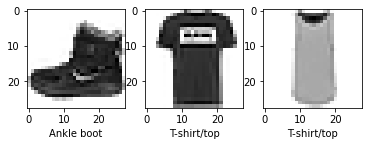

In [50]:
# 画像の可視化(Matplotlibを利用)
plt.figure()

# 1枚目
plt.subplot(1, 3, 1)                                                             # 1行3列の1つ目にプロット
plt.imshow(train_images[0], cmap=plt.cm.binary)                 # image
plt.xlabel(class_names[train_labels[0]])                                # label 

# 2枚目
plt.subplot(1, 3, 2)
plt.imshow(train_images[1], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[1]])

# 3枚目
plt.subplot(1, 3, 3)
plt.imshow(train_images[2], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[2]])
plt.show()

In [51]:
model = keras.models.Sequential([
  # 畳み込み層
  keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
  # プーリング層
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  # マトリックスからベクトルへ変換
  keras.layers.Flatten(),
  # 全結合層
  keras.layers.Dense(128, activation='relu'),
  # 全結合層(識別クラス数を指定)
  keras.layers.Dense(10, activation='softmax') 
])

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
# モデルに学習させるためShapeを(28, 28, 1)に変換
train_images_input = tf.expand_dims(train_images / 255., -1)

# 学習
batch_size = 600 
epochs = 5 # 学習回数
model.fit(train_images_input, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/5
100/100 [==============================] - 1s 8ms/step - loss: 7.0783e-04 - accuracy: 1.0000
Epoch 2/5
100/100 [==============================] - 1s 8ms/step - loss: 6.7960e-04 - accuracy: 1.0000
Epoch 3/5
100/100 [==============================] - 1s 8ms/step - loss: 6.5031e-04 - accuracy: 1.0000
Epoch 4/5
100/100 [==============================] - 1s 8ms/step - loss: 6.2185e-04 - accuracy: 1.0000
Epoch 5/5
100/100 [==============================] - 1s 8ms/step - loss: 5.7890e-04 - accuracy: 1.0000


In [57]:
# モデルに検証させるためShapeを(28, 28, 1)に変換
test_images_input = tf.expand_dims(test_images / 255., -1)

# 評価
test_loss, test_acc = model.evaluate(test_images_input, test_labels, verbose=2)
print()

# 評価正解率の出力
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.5811 - accuracy: 0.9183

Test loss: 0.5810658931732178
Test accuracy: 0.9182999730110168


In [58]:
# 正解/不正解をN件取得する探す関数
def get_sample_images(images, labels, preds, n_sample=3):
  n_correct = 0
  n_incorrect = 0
  corrects = []
  incorrects = []
  for i in range(len(images)):
    image = images[i]
    label = labels[i]
    pred = preds[i]
    pred_idx = np.argmax(pred)

    if pred_idx == label and n_correct < n_sample:
      corrects.append([image, label, pred_idx])
      n_correct += 1
    elif pred_idx != label and n_incorrect < n_sample:
      incorrects.append([image, label, pred_idx])
      n_incorrect += 1
    
    if n_correct == n_sample and n_incorrect == n_sample:
      break

  return corrects, incorrects

In [59]:
# 学習済みモデルを用いて検証用画像データセットを入力にクラスを予測
predictions = model.predict(test_images_input) 

# 正解/不正解を5件ずつ取得
n_sample = 8
corrects, incorrects = get_sample_images(test_images, test_labels, predictions, n_sample=n_sample)

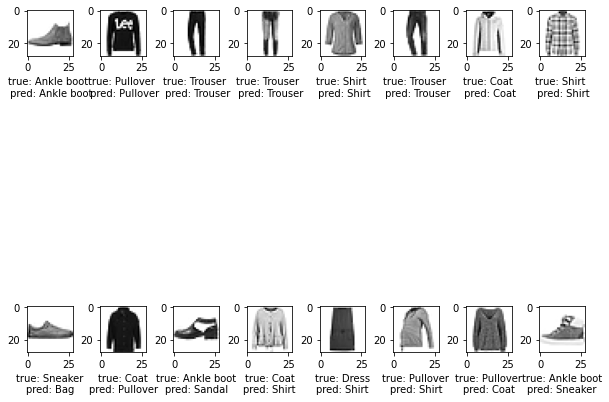

In [60]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0.6)

# 正解画像をプロット
for i in range(len(corrects)):
  plt.subplot(2, n_sample, i+1)
  plt.imshow(corrects[i][0], cmap=plt.cm.binary)
  true_class = class_names[corrects[i][1]]
  pred_class = class_names[corrects[i][2]]
  plt.xlabel(f'true: {true_class} \n pred: {pred_class}')

# 不正解画像をプロット
for i in range(len(incorrects)):
  plt.subplot(2, n_sample, n_sample+i+1)
  plt.imshow(incorrects[i][0], cmap=plt.cm.binary)
  true_class = class_names[incorrects[i][1]]
  pred_class = class_names[incorrects[i][2]]
  plt.xlabel(f'true: {true_class}\npred: {pred_class}')
plt.show()